# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as scipy
import matplotlib.pyplot as plt
import requests
import io 
from __future__ import division
import seaborn as sns
%matplotlib inline

# Saving data

In [2]:
url = "http://www.football-data.co.uk/mmz4281/1819/D1.csv" # the dataset we will be using

In [3]:
### Saving the csv file to my Predictor folder ###

testfile = requests.get(url).content
df=pd.read_csv(io.StringIO(testfile.decode('utf-8')))
df.to_csv("~/Desktop/Bundesliga-Predictor/datasets/D1.csv")

In [4]:
### Reading the csv file ###

df = pd.read_csv("~/Desktop/Bundesliga-Predictor/datasets/D1.csv")
df.columns

Index(['Unnamed: 0', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
       'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD',
       'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA',
       'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [6]:
### Head of the csv file ### -- more on the abbreviations in notes.txt 

df.tail()

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
238,238,D1,30/03/2019,Nurnberg,Augsburg,3,0,H,0,0,...,1.79,20,0.0,2.12,2.08,1.83,1.80,3.17,3.37,2.42
239,239,D1,30/03/2019,RB Leipzig,Hertha,5,0,H,2,0,...,2.11,23,-1.0,1.92,1.85,2.17,2.00,1.60,4.07,6.32
240,240,D1,30/03/2019,Werder Bremen,Mainz,3,1,H,2,0,...,2.25,22,-1.0,2.13,2.08,1.85,1.79,1.65,4.13,5.58
241,241,D1,31/03/2019,Ein Frankfurt,Stuttgart,3,0,H,1,0,...,2.46,23,-1.5,2.35,2.23,1.75,1.68,1.52,4.63,6.35
242,242,D1,31/03/2019,Hannover,Schalke 04,0,1,A,0,1,...,1.94,21,1.0,1.60,1.55,2.60,2.53,4.28,3.72,1.91


# Cleaning the data

In [7]:
### Removing betting data ###
# Bonus: Add betting data as the input to improve your model

import warnings
warnings.filterwarnings('ignore')

bet_16 = df.ix[:,23:] ## for future purposes

NUMBEROFTEAMS = 18 # constant for the number of teams in the Premier League
res_16 = df.ix[:,:23]
res_16 = res_16.drop(['Div','Date'],axis=1) # division and date aren't important

### Creating a feature table ###

feature_table = df.ix[:,:23]

In [8]:
res_16.tail(10)

,Unnamed: 0,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
233,233,Leverkusen,Werder Bremen,1,3,A,0,2,A,15,...,2,5,8,11,10,3,3,2,0,0
234,234,Hoffenheim,Leverkusen,4,1,H,1,1,D,13,...,5,6,8,6,4,7,2,2,0,0
235,235,Dortmund,Wolfsburg,2,0,H,0,0,D,11,...,5,3,11,13,5,4,0,3,0,0
236,236,Fortuna Dusseldorf,M'gladbach,3,1,H,3,0,H,8,...,4,6,14,13,1,2,2,3,0,0
237,237,Freiburg,Bayern Munich,1,1,D,1,1,D,12,...,5,8,8,9,1,7,3,1,0,0
238,238,Nurnberg,Augsburg,3,0,H,0,0,D,12,...,4,3,8,12,4,4,1,3,0,0
239,239,RB Leipzig,Hertha,5,0,H,2,0,H,21,...,9,0,7,6,6,3,1,1,0,0
240,240,Werder Bremen,Mainz,3,1,H,2,0,H,8,...,4,5,11,9,7,8,0,1,0,0
241,241,Ein Frankfurt,Stuttgart,3,0,H,1,0,H,11,...,5,3,13,10,5,5,2,1,0,0
242,242,Hannover,Schalke 04,0,1,A,0,1,A,15,...,3,3,16,17,8,2,1,1,0,0


In [9]:
### Creating a new table which will be used to train the model ###

# Team, Home Goals Scored, Away Goals Scored, Home Attacking Strength, Away Attacking Strength, 
# Home Goals Conceded, Away Goals Conceded, Home Defensive Strength, Away Defensive Strength
table = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS',))
table = table[:-10]
table

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS


In [10]:
#res_16 = res_16[:-10] #deleting the last 10 
#res_16.shape[0]

In [11]:
### Data analysis for Home Goals Scored, AGS, Home Goals Conceded, AGC ###

avg_HGS = res_16.FTHG.sum()*1.0 / res_16.shape[0]
avg_AGS = res_16.FTAG.sum()*1.0 / res_16.shape[0]
avg_HGC = avg_AGS # HGC = AGS
avg_AGC = avg_HGS # AGC = HGS
print("Average number of goals at home",avg_HGS)
print("Average number of goals away", avg_AGS)
print("Average number of goals conceded at home",avg_HGC)
print("Average number of goals conceded away",avg_AGC)

Average number of goals at home 1.757201646090535
Average number of goals away 1.3621399176954732
Average number of goals conceded at home 1.3621399176954732
Average number of goals conceded away 1.757201646090535


In [12]:
### Grouping by HomeTeam and AwayTeam ###
res_home = res_16.groupby('HomeTeam')
res_away = res_16.groupby('AwayTeam')

### List of Arsenal home games ###
list(res_home)[0][1]

,Unnamed: 0,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
10,10,Augsburg,M'gladbach,1,1,D,1,0,H,18,...,7,2,12,12,9,4,1,2,0,0
28,28,Augsburg,Werder Bremen,2,3,A,1,2,A,21,...,7,7,10,11,7,4,2,2,0,0
52,52,Augsburg,Freiburg,4,1,H,2,0,H,21,...,10,6,12,8,5,3,0,1,0,0
64,64,Augsburg,RB Leipzig,0,0,D,0,0,D,6,...,0,3,20,24,2,2,2,5,0,0
82,82,Augsburg,Nurnberg,2,2,D,1,0,H,17,...,4,5,16,11,6,6,3,3,0,0
100,100,Augsburg,Ein Frankfurt,1,3,A,0,1,A,25,...,10,7,3,12,8,5,1,2,0,0
127,127,Augsburg,Schalke 04,1,1,D,1,0,H,17,...,9,5,17,8,6,7,2,1,0,0
151,151,Augsburg,Wolfsburg,2,3,A,0,2,A,10,...,4,5,12,11,3,4,2,3,0,0
154,154,Augsburg,Fortuna Dusseldorf,1,2,A,0,1,A,13,...,6,3,13,9,5,3,3,1,0,0
178,178,Augsburg,Mainz,3,0,H,2,0,H,19,...,8,0,18,10,7,3,0,1,0,0


In [13]:
### Adding HGS, HGC, AGS, AGC to the table ###

table.HGS = res_home.FTHG.sum().values
table.HGC = res_home.FTAG.sum().values
table.AGS = res_away.FTAG.sum().values
table.AGC = res_away.FTHG.sum().values

### Adding the the team to the table ### -- implemented in a strange manner

teams = []
i = 0
while i < NUMBEROFTEAMS:
    x = list(res_home.HomeTeam)[i][0]
    teams.append(x)
    i+=1
    
    
table.Team = teams
table # HAS, AAS, HDS, ADS still missing

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Augsburg,24,13,NaN,NaN,21,29,NaN,NaN
1,Bayern Munich,35,34,NaN,NaN,12,16,NaN,NaN
2,Dortmund,45,21,NaN,NaN,18,12,NaN,NaN
3,Ein Frankfurt,31,23,NaN,NaN,16,14,NaN,NaN
4,Fortuna Dusseldorf,20,16,NaN,NaN,22,29,NaN,NaN
5,Freiburg,26,12,NaN,NaN,21,22,NaN,NaN
6,Hannover,11,13,NaN,NaN,25,37,NaN,NaN
7,Hertha,21,19,NaN,NaN,19,25,NaN,NaN
8,Hoffenheim,25,29,NaN,NaN,15,24,NaN,NaN
9,Leverkusen,21,27,NaN,NaN,19,25,NaN,NaN


In [14]:
### Computing the number of games each team played ### -- assumming number of home games == number of away games
num_games = res_16.shape[0]/NUMBEROFTEAMS
num_games

13.5

In [15]:
### Completing the Home Attacking Strength, Away Attacking Strength, Home Defensive Strength ###
### Away Defensive Strength ###

table.HAS = (table.HGS / num_games) / avg_HGS
table.AAS = (table.AGS / num_games) / avg_AGS
table.HDS = (table.HGC / num_games) / avg_HGC
table.ADS = (table.AGC / num_games) / avg_AGC
table

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Augsburg,24,13,1.011710,0.706949,21,29,1.141994,1.222482
1,Bayern Munich,35,34,1.475410,1.848943,12,16,0.652568,0.674473
2,Dortmund,45,21,1.896956,1.141994,18,12,0.978852,0.505855
3,Ein Frankfurt,31,23,1.306792,1.250755,16,14,0.870091,0.590164
4,Fortuna Dusseldorf,20,16,0.843091,0.870091,22,29,1.196375,1.222482
5,Freiburg,26,12,1.096019,0.652568,21,22,1.141994,0.927400
6,Hannover,11,13,0.463700,0.706949,25,37,1.359517,1.559719
7,Hertha,21,19,0.885246,1.033233,19,25,1.033233,1.053864
8,Hoffenheim,25,29,1.053864,1.577039,15,24,0.815710,1.011710
9,Leverkusen,21,27,0.885246,1.468278,19,25,1.033233,1.053864


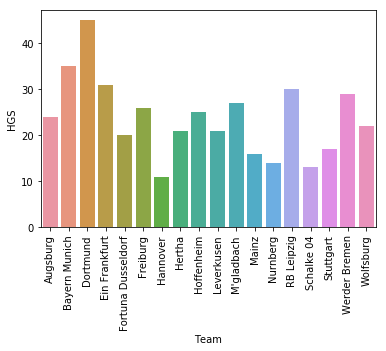

In [16]:
### Plotting the results in a nice bar chart ###

has_plot = sns.barplot(table.Team,table.HGS) # Home Goals Scored
for item in has_plot.get_xticklabels():
    item.set_rotation(90) # so that the x-axis labels are readable

In [17]:
### Man United Stats ###

table[table.Team == "Mainz"]

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
11,Mainz,16,12,0.674473,0.652568,16,32,0.870091,1.348946


In [18]:
''' feature_table contains all the fixtures in the current season.
ftr = full time result
hst = home shots on target
ast = away shots on target
'''

### Creating a feature table ###
# We will only add HAS, HDS, AAS, ADS since they are the immediate result of HGS, HGC, AGS, AGC

feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST']]
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
f_HGS = []
f_HGC = []
f_AGS = []
f_AGC = []
for index,row in feature_table.iterrows():
    f_HAS.append(table[table['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table[table['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table[table['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table[table['Team'] == row['AwayTeam']]['ADS'].values[0])
    f_HGS.append(table[table['Team'] == row['HomeTeam']]['HGS'].values[0])
    f_HGC.append(table[table['Team'] == row['HomeTeam']]['HGC'].values[0])
    f_AGS.append(table[table['Team'] == row['AwayTeam']]['AGS'].values[0])
    f_AGC.append(table[table['Team'] == row['AwayTeam']]['HGC'].values[0])
    
feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS
feature_table['HGS'] = f_HGS
feature_table['HGC'] = f_HGC
feature_table['AGS'] = f_AGS
feature_table['AGC'] = f_AGC


feature_table.head(15)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,HGS,HGC,AGS,AGC
0,Bayern Munich,Hoffenheim,H,5,5,1.475410,0.652568,1.577039,1.011710,35,12,29,15
1,Fortuna Dusseldorf,Augsburg,A,5,7,0.843091,1.196375,0.706949,1.222482,20,22,13,21
2,Freiburg,Ein Frankfurt,A,6,2,1.096019,1.141994,1.250755,0.590164,26,21,23,16
3,Hertha,Nurnberg,H,3,3,0.885246,1.033233,0.435045,1.517564,21,19,8,16
4,M'gladbach,Leverkusen,H,7,3,1.138173,0.815710,1.468278,1.053864,27,15,27,19
5,Werder Bremen,Hannover,D,3,4,1.222482,1.196375,0.706949,1.559719,29,22,13,25
6,Wolfsburg,Schalke 04,H,7,4,0.927400,1.087613,0.815710,0.969555,22,20,15,21
7,Dortmund,RB Leipzig,H,5,7,1.896956,0.978852,1.033233,0.505855,45,18,19,8
8,Mainz,Stuttgart,H,3,3,0.674473,0.870091,0.489426,1.433255,16,16,9,25
9,Hannover,Dortmund,D,0,3,0.463700,1.359517,1.141994,0.505855,11,25,21,18


In [19]:
### Representing the result as an integer ### -- this will be the y

def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [20]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)

In [21]:
pred_table = feature_table.tail(10)
feature_table = feature_table[:-10] ### Removing last week so we can predict it

feature_table.tail(15)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,HGS,HGC,AGS,AGC,Result
218,Dortmund,Stuttgart,H,8,1,1.896956,0.978852,0.489426,1.433255,45,18,9,25,1
219,Freiburg,Hertha,H,4,6,1.096019,1.141994,1.033233,1.053864,26,21,19,19,1
220,Mainz,M'gladbach,A,2,4,0.674473,0.870091,1.033233,0.800937,16,16,19,15,-1
221,RB Leipzig,Augsburg,D,4,3,1.264637,0.435045,0.706949,1.222482,30,8,13,21,0
222,Hannover,Leverkusen,A,5,5,0.463700,1.359517,1.468278,1.053864,11,25,27,19,-1
223,Hoffenheim,Nurnberg,H,6,5,1.053864,0.815710,0.435045,1.517564,25,15,8,16,1
224,Fortuna Dusseldorf,Ein Frankfurt,A,3,6,0.843091,1.196375,1.250755,0.590164,20,22,23,16,-1
225,M'gladbach,Freiburg,D,2,2,1.138173,0.815710,0.652568,0.927400,27,15,12,21,0
226,Augsburg,Hannover,H,10,4,1.011710,1.141994,0.706949,1.559719,24,21,13,25,1
227,Hertha,Dortmund,A,4,8,0.885246,1.033233,1.141994,0.505855,21,19,21,18,-1


In [22]:
pred_table

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,HGS,HGC,AGS,AGC,Result
233,Leverkusen,Werder Bremen,A,2,5,0.885246,1.033233,1.087613,0.716628,21,19,20,22,-1
234,Hoffenheim,Leverkusen,H,5,6,1.053864,0.815710,1.468278,1.053864,25,15,27,19,1
235,Dortmund,Wolfsburg,H,5,3,1.896956,0.978852,1.196375,0.885246,45,18,22,20,1
236,Fortuna Dusseldorf,M'gladbach,H,4,6,0.843091,1.196375,1.033233,0.800937,20,22,19,15,1
237,Freiburg,Bayern Munich,D,5,8,1.096019,1.141994,1.848943,0.674473,26,21,34,12,0
238,Nurnberg,Augsburg,H,4,3,0.590164,0.870091,0.706949,1.222482,14,16,13,21,1
239,RB Leipzig,Hertha,H,9,0,1.264637,0.435045,1.033233,1.053864,30,8,19,19,1
240,Werder Bremen,Mainz,H,4,5,1.222482,1.196375,0.652568,1.348946,29,22,12,16,1
241,Ein Frankfurt,Stuttgart,H,5,3,1.306792,0.870091,0.489426,1.433255,31,16,9,25,1
242,Hannover,Schalke 04,A,3,3,0.463700,1.359517,0.815710,0.969555,11,25,15,21,-1


# Training the data

In [23]:
### Setting the parameters and the result for our model ###

from sklearn.model_selection import train_test_split

X = feature_table[['HST','AST','HAS','HDS','AAS','ADS','HGS','HGC','AGS','AGC']]
y = feature_table['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [24]:
### Printing the shapes ###

print(X_train.shape, X_test.shape)

(174, 10) (59, 10)


In [25]:
### Importing machine learning Classifiers ###

import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import voting_classifier
from sklearn.svm import LinearSVC

In [26]:
### Comparing 4 Classifiers and their accuracies ###

RFC = RandomForestClassifier()
MNB = MultinomialNB()
XGB = XGBClassifier()
SVC = LinearSVC()

In [27]:
### SVC ### -- changes a lot

y_pred = SVC.fit(X_train,y_train).predict(X_test)
print("Test Accuracy score: ", accuracy_score(y_pred,y_test))
y_pred = SVC.fit(X_train,y_train).predict(X_train)
print("Train Accuracy score: ", accuracy_score(y_pred,y_train))

### Mean of 10 scores out of the whole set ###

scores = cross_val_score(SVC, X, y, cv=10) # TODO: optimize
print(scores)
print("Mean accuracy score:")
print(scores.mean())

Test Accuracy score:  0.6440677966101694
Train Accuracy score:  0.5747126436781609
[0.52       0.44       0.64       0.39130435 0.47826087 0.47826087
 0.34782609 0.40909091 0.31818182 0.81818182]
Mean accuracy score:
0.48411067193675894


In [28]:
### RFC ### -- Train accuracy is maybe overfitted here
y_pred = RFC.fit(X_train,y_train).predict(X_test)
print("Test Accuracy score: ", accuracy_score(y_pred,y_test))
y_pred = RFC.fit(X_train,y_train).predict(X_train)
print("Train Accuracy score: ", accuracy_score(y_pred,y_train))

### Mean of 10 scores out of the whole set ###

scores = cross_val_score(RFC, X, y, cv=10)
print(scores)
print("Mean accuracy score:")
print(scores.mean())



Test Accuracy score:  0.4576271186440678
Train Accuracy score:  0.9655172413793104
[0.4        0.52       0.56       0.47826087 0.52173913 0.39130435
 0.47826087 0.72727273 0.54545455 0.5       ]
Mean accuracy score:
0.5122292490118576


In [29]:
### XGB ### -- a very good accuracy

y_pred = XGB.fit(X_train,y_train).predict(X_test)
print("Test Accuracy score: ", accuracy_score(y_pred,y_test))
y_pred = XGB.fit(X_train,y_train).predict(X_train)
print("Train Accuracy score: ", accuracy_score(y_pred,y_train))

### Mean of 10 scores out of the whole set ###

scores = cross_val_score(XGB, X, y, cv=10) # TODO: optimize
print(scores)
print("Mean accuracy score:")
print(scores.mean())

Test Accuracy score:  0.5084745762711864
Train Accuracy score:  0.867816091954023
[0.4        0.56       0.72       0.47826087 0.60869565 0.43478261
 0.39130435 0.63636364 0.5        0.72727273]
Mean accuracy score:
0.5456679841897233


In [30]:
### MNB ### -- all accuracies not bad either

y_pred = MNB.fit(X_train,y_train).predict(X_test)
print("Test Accuracy score: ", accuracy_score(y_pred,y_test))
y_pred = MNB.fit(X_train,y_train).predict(X_train)
print("Train Accuracy score: ", accuracy_score(y_pred,y_train))

### Mean of 10 scores out of the whole set ###

scores = cross_val_score(MNB, X, y, cv=10) # TODO: optimize
print(scores)
print("Mean accuracy score:")
print(scores.mean())

Test Accuracy score:  0.6779661016949152
Train Accuracy score:  0.5977011494252874
[0.44       0.6        0.72       0.39130435 0.52173913 0.52173913
 0.52173913 0.86363636 0.63636364 0.81818182]
Mean accuracy score:
0.6034703557312253


# Improvements -- Working on

## Adding past games statistics (goals, shots, corners at the moment)

In [36]:
feat_table = res_16.sort_index(ascending=False)
feat_table = feat_table[['HomeTeam','AwayTeam','FTR','FTHG','FTAG','HS','AS','HC','AC']]
feat_table.head()


,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC
242,Hannover,Schalke 04,A,0,1,15,6,8,2
241,Ein Frankfurt,Stuttgart,H,3,0,11,10,5,5
240,Werder Bremen,Mainz,H,3,1,8,12,7,8
239,RB Leipzig,Hertha,H,5,0,21,6,6,3
238,Nurnberg,Augsburg,H,3,0,12,14,4,4


In [37]:
table

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Augsburg,24,13,1.011710,0.706949,21,29,1.141994,1.222482
1,Bayern Munich,35,34,1.475410,1.848943,12,16,0.652568,0.674473
2,Dortmund,45,21,1.896956,1.141994,18,12,0.978852,0.505855
3,Ein Frankfurt,31,23,1.306792,1.250755,16,14,0.870091,0.590164
4,Fortuna Dusseldorf,20,16,0.843091,0.870091,22,29,1.196375,1.222482
5,Freiburg,26,12,1.096019,0.652568,21,22,1.141994,0.927400
6,Hannover,11,13,0.463700,0.706949,25,37,1.359517,1.559719
7,Hertha,21,19,0.885246,1.033233,19,25,1.033233,1.053864
8,Hoffenheim,25,29,1.053864,1.577039,15,24,0.815710,1.011710
9,Leverkusen,21,27,0.885246,1.468278,19,25,1.033233,1.053864


In [38]:
# Adding next week fixtures
new_fixtures = pd.DataFrame( [["M'gladbach",'Werder Bremen','D',0,0,0,0,0,0],
                             ['Augsburg','Hoffenheim','D',0,0,0,0,0,0],
                             ['Bayern Munich',"Dortmund",'D',0,0,0,0,0,0],
                             ['Schalke 04','Ein Frankfurt','D',0,0,0,0,0,0],
                             ['Wolfsburg','Hannover','D',0,0,0,0,0,0],
                             ['Hertha','Fortuna Dusseldorf','D',0,0,0,0,0,0],
                             ['Stuttgart','Nurnberg','D',0,0,0,0,0,0],
                             ['Leverkusen','RB Leibzig','D',0,0,0,0,0,0],
                             ['Mainz','Freiburg','D',0,0,0,0,0,0]],columns=feat_table.columns)

new_feat_table = new_fixtures.append(feat_table,ignore_index=True)
new_feat_table = new_feat_table.sort_index(ascending=False)
new_feat_table = new_feat_table.reset_index().drop(['index'], axis=1)
new_feat_table = new_feat_table.sort_index(ascending=False)
new_feat_table

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC
251,M'gladbach,Werder Bremen,D,0,0,0,0,0,0
250,Augsburg,Hoffenheim,D,0,0,0,0,0,0
249,Bayern Munich,Dortmund,D,0,0,0,0,0,0
248,Schalke 04,Ein Frankfurt,D,0,0,0,0,0,0
247,Wolfsburg,Hannover,D,0,0,0,0,0,0
246,Hertha,Fortuna Dusseldorf,D,0,0,0,0,0,0
245,Stuttgart,Nurnberg,D,0,0,0,0,0,0
244,Leverkusen,RB Leibzig,D,0,0,0,0,0,0
243,Mainz,Freiburg,D,0,0,0,0,0,0
242,Hannover,Schalke 04,A,0,1,15,6,8,2


In [39]:
feat_table = new_feat_table
feat_table.shape

(252, 9)

In [40]:
# Past Home Shots, Home Corners, Home Goals...

# Adding k recent performance measures
feat_table["past_HS"] = 0.0
feat_table["past_HC"] = 0.0
feat_table["past_AS"] = 0.0
feat_table["past_AC"] = 0.0
feat_table["past_HG"] = 0.0
feat_table["past_AG"] = 0.0

In [41]:
feat_table.head(12)


,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,past_HS,past_HC,past_AS,past_AC,past_HG,past_AG
251,M'gladbach,Werder Bremen,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
250,Augsburg,Hoffenheim,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
249,Bayern Munich,Dortmund,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
248,Schalke 04,Ein Frankfurt,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
247,Wolfsburg,Hannover,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
246,Hertha,Fortuna Dusseldorf,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
245,Stuttgart,Nurnberg,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
244,Leverkusen,RB Leibzig,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
243,Mainz,Freiburg,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
242,Hannover,Schalke 04,A,0,1,15,6,8,2,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
### testing
for index,row in feat_table.iterrows():
    print (row['HomeTeam'], table[table['Team'] == row['HomeTeam']]['HAS'].values)

M'gladbach [1.1381733]
Augsburg [1.0117096]
Bayern Munich [1.47540984]
Schalke 04 [0.54800937]
Wolfsburg [0.92740047]
Hertha [0.8852459]
Stuttgart [0.71662763]
Leverkusen [0.8852459]
Mainz [0.67447307]
Hannover [0.46370023]
Ein Frankfurt [1.30679157]
Werder Bremen [1.22248244]
RB Leipzig [1.264637]
Nurnberg [0.59016393]
Freiburg [1.09601874]
Fortuna Dusseldorf [0.84309133]
Dortmund [1.8969555]
Hoffenheim [1.05386417]
Leverkusen [0.8852459]
Ein Frankfurt [1.30679157]
Bayern Munich [1.47540984]
Wolfsburg [0.92740047]
Stuttgart [0.71662763]
Schalke 04 [0.54800937]
Hertha [0.8852459]
Augsburg [1.0117096]
M'gladbach [1.1381733]
Fortuna Dusseldorf [0.84309133]
Hoffenheim [1.05386417]
Hannover [0.46370023]
RB Leipzig [1.264637]
Mainz [0.67447307]
Freiburg [1.09601874]
Dortmund [1.8969555]
Bayern Munich [1.47540984]
Werder Bremen [1.22248244]
Wolfsburg [0.92740047]
Stuttgart [0.71662763]
Schalke 04 [0.54800937]
Nurnberg [0.59016393]
M'gladbach [1.1381733]
Leverkusen [0.8852459]
Hertha [0.88524

In [43]:
# Adding k recent performance metrics. Change value of k.
k = 4
for i in range(feat_table.shape[0]-1,-1,-1):
    row = feat_table.loc[i]
    ht = row.HomeTeam
    at = row.AwayTeam
    ht_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
    at_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)
    feat_table.set_value(i, 'past_HC', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k)
    feat_table.set_value(i, 'past_AC', (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k)
    feat_table.set_value(i, 'past_HS', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k)
    feat_table.set_value(i, 'past_AS', (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k)
    feat_table.set_value(i, 'past_HG', (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k)
    feat_table.set_value(i, 'past_AG', (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k)
    
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feat_table.iterrows():
    #print row
    f_HAS.append(table[table['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table[table['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table[table['Team'] == row['HomeTeam']]['AAS'].values[0])
    f_ADS.append(table[table['Team'] == row['HomeTeam']]['ADS'].values[0])
    
feat_table['HAS'] = f_HAS
feat_table['HDS'] = f_HDS
feat_table['AAS'] = f_AAS
feat_table['ADS'] = f_ADS   



In [44]:
feat_table.head()

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,past_HS,past_HC,past_AS,past_AC,past_HG,past_AG,HAS,HDS,AAS,ADS
251,M'gladbach,Werder Bremen,D,0,0,0,0,0,0,13.00,3.50,13.50,6.75,1.00,2.75,1.138173,0.815710,1.033233,0.800937
250,Augsburg,Hoffenheim,D,0,0,0,0,0,0,15.00,3.50,15.00,5.00,1.25,2.25,1.011710,1.141994,0.706949,1.222482
249,Bayern Munich,Dortmund,D,0,0,0,0,0,0,8.50,5.50,7.50,4.25,4.50,2.25,1.475410,0.652568,1.848943,0.674473
248,Schalke 04,Ein Frankfurt,D,0,0,0,0,0,0,15.75,3.25,11.50,4.50,0.75,2.50,0.548009,1.141994,0.815710,0.969555
247,Wolfsburg,Hannover,D,0,0,0,0,0,0,15.75,6.25,14.25,5.75,1.50,1.00,0.927400,1.087613,1.196375,0.885246


In [45]:
test_table = feat_table.drop(['FTHG','FTAG','HS','AS','HC','AC'],axis=1)
test_table.head()

,HomeTeam,AwayTeam,FTR,past_HS,past_HC,past_AS,past_AC,past_HG,past_AG,HAS,HDS,AAS,ADS
251,M'gladbach,Werder Bremen,D,13.00,3.50,13.50,6.75,1.00,2.75,1.138173,0.815710,1.033233,0.800937
250,Augsburg,Hoffenheim,D,15.00,3.50,15.00,5.00,1.25,2.25,1.011710,1.141994,0.706949,1.222482
249,Bayern Munich,Dortmund,D,8.50,5.50,7.50,4.25,4.50,2.25,1.475410,0.652568,1.848943,0.674473
248,Schalke 04,Ein Frankfurt,D,15.75,3.25,11.50,4.50,0.75,2.50,0.548009,1.141994,0.815710,0.969555
247,Wolfsburg,Hannover,D,15.75,6.25,14.25,5.75,1.50,1.00,0.927400,1.087613,1.196375,0.885246


In [46]:
test_table["Result"] = test_table.apply(lambda row: transformResult(row),axis=1)
test_table.sort_index(inplace=True)

In [47]:
print(feat_table.shape)
num_games = feat_table.shape[0]-10
num_games

(252, 19)


242

In [48]:
X_train = test_table[['past_HS','past_HC','past_AS','past_AC','past_HG','past_AG','HAS','HDS','AAS','ADS']].loc[0:num_games]
y_train = test_table['Result'].loc[0:num_games]
X_test = test_table[['past_HS','past_HC','past_AS','past_AC','past_HG','past_AG','HAS','HDS','AAS','ADS']].loc[num_games:]
y_test = test_table['Result'].loc[num_games:]

In [49]:
### Try these predictions again

# Adding additional improvements - home advantage

In [50]:
test_table["pastCornerDiff"] = (test_table["past_HC"] - test_table["past_AC"])/k
test_table["pastGoalDiff"] = (test_table["past_HG"] - test_table["past_AG"])/k
test_table["pastShotsDiff"] = (test_table["past_HS"] - test_table["past_AG"])/k

In [51]:
''' number of games to exclude in the training set for validation
For example, if 240 games have been played, test_table has 250 fixtures - the last 10 being the ones that haven't
been played. So, we set aside 20 fixtures from the training set containing 240 fixtures for validation.''' 
num_games = feat_table.shape[0]-9
print(num_games)
v_split = 15
n_games = num_games - v_split
n_games # for validation purposes

243


228

In [52]:
test_table = test_table.fillna(0)
test_table.tail()

,HomeTeam,AwayTeam,FTR,past_HS,past_HC,past_AS,past_AC,past_HG,past_AG,HAS,HDS,AAS,ADS,Result,pastCornerDiff,pastGoalDiff,pastShotsDiff
247,Wolfsburg,Hannover,D,15.75,6.25,14.25,5.75,1.50,1.00,0.927400,1.087613,1.196375,0.885246,0,0.1250,0.1250,3.6875
248,Schalke 04,Ein Frankfurt,D,15.75,3.25,11.50,4.50,0.75,2.50,0.548009,1.141994,0.815710,0.969555,0,-0.3125,-0.4375,3.3125
249,Bayern Munich,Dortmund,D,8.50,5.50,7.50,4.25,4.50,2.25,1.475410,0.652568,1.848943,0.674473,0,0.3125,0.5625,1.5625
250,Augsburg,Hoffenheim,D,15.00,3.50,15.00,5.00,1.25,2.25,1.011710,1.141994,0.706949,1.222482,0,-0.3750,-0.2500,3.1875
251,M'gladbach,Werder Bremen,D,13.00,3.50,13.50,6.75,1.00,2.75,1.138173,0.815710,1.033233,0.800937,0,-0.8125,-0.4375,2.5625


In [53]:
### Is this manipulation needed?
X_train_0 = test_table[['past_HC','past_AS','past_AC','past_HG','past_AG','HAS','HDS','AAS','ADS']].loc[0:num_games]
y_train_0 = test_table['Result'].loc[0:num_games]
X_predict_0 = test_table[['past_HC','past_AS','past_AC','past_HG','past_AG','HAS','HDS','AAS','ADS']].loc[num_games:]

test_table.drop(['past_HC','past_AS','past_AC','past_HG','past_AG'],axis=1)
X_train = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[0:n_games]
y_train = test_table['Result'].loc[0:n_games]
X_test = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[n_games:num_games-1]
y_test = test_table['Result'].loc[n_games:num_games-1]
X_predict = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[num_games:]

In [54]:
X_predict

,pastCornerDiff,pastGoalDiff,pastShotsDiff,HAS,HDS,AAS,ADS
243,0.3125,-0.1250,3.0000,0.674473,0.870091,0.652568,1.348946
244,1.6875,0.4375,2.6250,0.885246,1.033233,1.468278,1.053864
245,-0.1250,0.1875,3.0625,0.716628,1.359517,0.489426,1.433255
246,0.4375,-0.2500,3.7500,0.885246,1.033233,1.033233,1.053864
247,0.1250,0.1250,3.6875,0.927400,1.087613,1.196375,0.885246
248,-0.3125,-0.4375,3.3125,0.548009,1.141994,0.815710,0.969555
249,0.3125,0.5625,1.5625,1.475410,0.652568,1.848943,0.674473
250,-0.3750,-0.2500,3.1875,1.011710,1.141994,0.706949,1.222482
251,-0.8125,-0.4375,2.5625,1.138173,0.815710,1.033233,0.800937


In [55]:
### SVC ### -- changes a lot

y_pred = SVC.fit(X_train,y_train).predict(X_test)
print("Test Accuracy score: ", accuracy_score(y_pred,y_test))
y_pred = SVC.fit(X_train,y_train).predict(X_train)
print("Train Accuracy score: ", accuracy_score(y_pred,y_train))

### Mean of 10 scores out of the whole set ###

scores = cross_val_score(SVC, X, y, cv=10) # TODO: optimize
print(scores)
print("Mean accuracy score:")
print(scores.mean())

Test Accuracy score:  0.7333333333333333
Train Accuracy score:  0.5021834061135371
[0.64       0.6        0.48       0.39130435 0.56521739 0.52173913
 0.26086957 0.45454545 0.68181818 0.72727273]
Mean accuracy score:
0.5322766798418972


# Optimizing for the best value of k


In [56]:
#KNN
plot_scores_knn = []
for b in range(1,50):
    clf_knn = KNeighborsClassifier(n_neighbors=b)
    clf_knn.fit(X_train,y_train)
    scores = accuracy_score(y_test,clf_knn.predict(X_test))
    plot_scores_knn.append(scores)

#XGBClassifier
plot_scores_XGB = []
for i in range(1,100):
    clf_XGB = XGBClassifier(n_estimators=i,max_depth=100)
    clf_XGB.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_XGB.predict(X_test))
    plot_scores_XGB.append(scores)
    
#Logistic Regression
plot_scores_logreg= []
cs = [0.01,0.02,0.1,0.5,1,3,4,5,10]
for c in cs:
    clf_logreg = LogisticRegression(C=c,solver='lbfgs',multi_class='ovr')
    clf_logreg.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_logreg.predict(X_test))
    plot_scores_logreg.append(scores)
    
# Random Forest Classifier
plot_scores_RFC = []
for i in range(1,100):
    clf_RFC = RandomForestClassifier(n_estimators=i)
    clf_RFC.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_RFC.predict(X_test))
    plot_scores_RFC.append(scores)
    


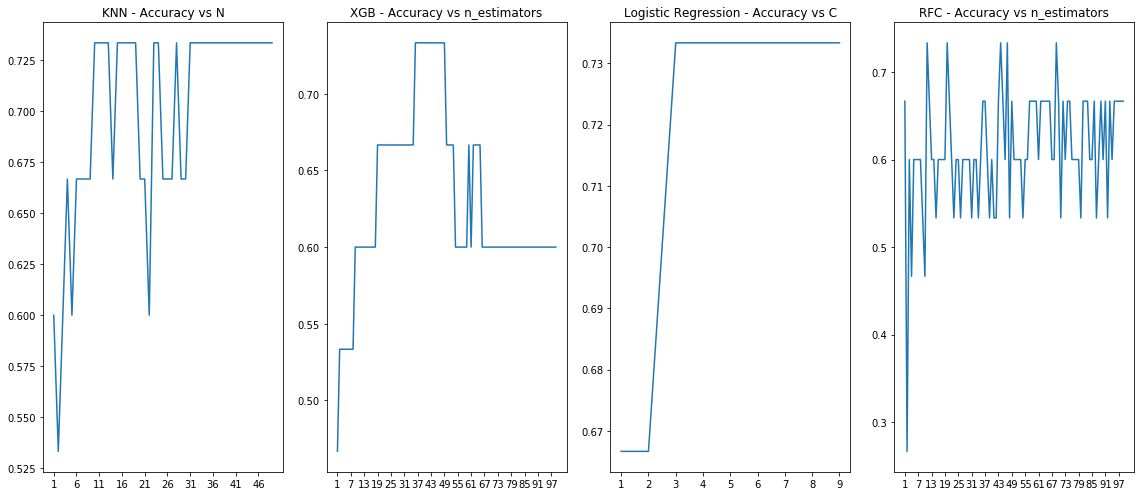

In [57]:
### Plotting the results ###

fig = plt.figure(figsize = (16,7))
# plt.style.use('ggplot')

ax1 = fig.add_subplot(1,4,1)
ax1.plot(range(1,50),plot_scores_knn);
ax1.set_title("KNN - Accuracy vs N")
ax1.set_xticks(range(1,50,5));

ax2 = fig.add_subplot(1,4,2)
ax2.plot(range(1,100),plot_scores_XGB);
ax2.set_xticks(range(1,100,6));
ax2.set_title("XGB - Accuracy vs n_estimators")

ax3 = fig.add_subplot(1,4,3)
ax3.plot(range(1,10),plot_scores_logreg);
ax3.set_xticks(range(1,10));
ax3.set_title("Logistic Regression - Accuracy vs C")

ax4 = fig.add_subplot(1,4,4)
ax4.plot(range(1,100),plot_scores_RFC);
ax4.set_xticks(range(1,100,6));
ax4.set_title("RFC - Accuracy vs n_estimators")

fig.tight_layout()

In [58]:
max_knn_n = max(plot_scores_knn)
max_knn_ind = plot_scores_knn.index(max_knn_n)

max_XGB_e = max(plot_scores_XGB)
max_XGB_ind = plot_scores_XGB.index(max_XGB_e) if plot_scores_XGB.index(max_XGB_e)!=0 else 1

max_logreg_c = max(plot_scores_logreg)
max_logreg_ind = plot_scores_logreg.index(max_logreg_c)

max_RFC_e = max(plot_scores_RFC)
max_RFC_ind = plot_scores_RFC.index(max_RFC_e)

print(max_knn_n, max_knn_ind)
print(max_XGB_e, max_XGB_ind)
print(max_logreg_c, max_logreg_ind)
print(max_RFC_e, max_RFC_ind)


0.7333333333333333 9
0.7333333333333333 35
0.7333333333333333 2
0.7333333333333333 10


In [59]:
### Training the classifiers ###

KNN = KNeighborsClassifier(n_neighbors=max_knn_ind).fit(X_train,y_train)
XGB = XGBClassifier(n_estimators=max_XGB_ind).fit(X_train,y_train)
LOGREG = LogisticRegression(C=max_logreg_ind,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)
RFC = RandomForestClassifier(n_estimators=max_RFC_ind).fit(X_train, y_train)
SVC = LinearSVC().fit(X_train, y_train)
MNB = MultinomialNB().fit(X_train_0, y_train_0) # -- do not use difference but just these HC and AC -- doesnt take negative values

In [60]:
y_pred_knn = KNN.predict(X_predict)
y_pred_XGB = XGB.predict(X_predict)
y_pred_logreg = LOGREG.predict(X_predict)
y_pred_rfc = RFC.predict(X_predict)
y_pred_svc = SVC.predict(X_predict)
y_pred_mnb = MNB.predict(X_predict_0)

In [61]:
this_week = test_table[['HomeTeam','AwayTeam']].loc[num_games:]
this_week['Result_knn']=y_pred_knn
this_week['Result_XGB']=y_pred_XGB
this_week['Result_logreg']=y_pred_logreg
this_week['Result_rfc']=y_pred_rfc
this_week['Result_svc']=y_pred_svc
this_week['Result_mnb']=y_pred_mnb
this_week

,HomeTeam,AwayTeam,Result_knn,Result_XGB,Result_logreg,Result_rfc,Result_svc,Result_mnb
243,Mainz,Freiburg,0,1,-1,-1,-1,1
244,Leverkusen,RB Leibzig,1,1,1,1,1,1
245,Stuttgart,Nurnberg,-1,-1,1,1,1,1
246,Hertha,Fortuna Dusseldorf,1,1,-1,1,-1,1
247,Wolfsburg,Hannover,1,0,1,0,1,1
248,Schalke 04,Ein Frankfurt,1,-1,-1,-1,-1,-1
249,Bayern Munich,Dortmund,1,1,1,1,1,1
250,Augsburg,Hoffenheim,1,1,-1,-1,-1,1
251,M'gladbach,Werder Bremen,-1,-1,-1,-1,-1,1


In [62]:
### Transforming the columns back ###

def transformResultBack(row,col_name):
    if(row[col_name] == 1):
        return 'H'
    elif(row[col_name] == -1):
        return 'A'
    else:
        return 'D'

In [63]:
this_week["Res_knn"] = this_week.apply(lambda row: transformResultBack(row,"Result_knn"),axis=1)
this_week["Res_XGB"] = this_week.apply(lambda row: transformResultBack(row,"Result_XGB"),axis=1)
this_week["Res_logreg"] = this_week.apply(lambda row: transformResultBack(row,"Result_logreg"),axis=1)
this_week["Res_rfc"] = this_week.apply(lambda row: transformResultBack(row,"Result_rfc"),axis=1)
this_week["Res_svc"] = this_week.apply(lambda row: transformResultBack(row,"Result_svc"),axis=1)
this_week["Res_mnb"] = this_week.apply(lambda row: transformResultBack(row,"Result_mnb"),axis=1)

this_week.drop(["Result_knn", "Result_XGB","Result_logreg","Result_rfc","Result_svc","Result_mnb"],axis=1,inplace=True)

In [64]:
this_week

,HomeTeam,AwayTeam,Res_knn,Res_XGB,Res_logreg,Res_rfc,Res_svc,Res_mnb
243,Mainz,Freiburg,D,H,A,A,A,H
244,Leverkusen,RB Leibzig,H,H,H,H,H,H
245,Stuttgart,Nurnberg,A,A,H,H,H,H
246,Hertha,Fortuna Dusseldorf,H,H,A,H,A,H
247,Wolfsburg,Hannover,H,D,H,D,H,H
248,Schalke 04,Ein Frankfurt,H,A,A,A,A,A
249,Bayern Munich,Dortmund,H,H,H,H,H,H
250,Augsburg,Hoffenheim,H,H,A,A,A,H
251,M'gladbach,Werder Bremen,A,A,A,A,A,H


In [2]:
"""
Google predictions:
Mainz
Leverkusen
Stuttgart
Hertha
Wolfsburg
Frankfurt
Bayern
Augsburg
M'gladbach

"""

"\nPredictions:\nIgnore 233 - wrong prediction, Bremen won\n\nGoogle predictions:\nFrankfurt\nSchalke\nLeibzig\nDortmund\nBayern\nBremen\nM'gladbach\nAugsburg\nHoffenheim\n"

In [1]:
"""
1 - correct
0 - incorrect
Results | My pred | Google pred :
Mainz | 0 | 1
Leipzig | 0 | 0
Sttutgart draw | 0 | 0
Fortuna | 0 | 0
Wolfsburg | 1 | 1
Frankfurt | 1 | 1
Bayern | 1 | 1


Total: 10/16 | 10/16
"""

'\n1 - correct\n0 - incorrect\nResults | My pred | Google pred :\nHoffenheim | 1 | 1\nAugsburg | 0 | 0\nFortuna Dusseldorf | 1 | 0\nWerder Bremen | 1 | 1\nBayern Draw | 0 | 0\nDortmund | 1 | 1\n\n'

In [3]:
"""
Models:
kNN: 8/16
XGB: 9/16
logreg: 11/16
rfc: 6/16
svc: 11/16
mnb: 10/16

"""

'\nModels:\nkNN: 3/6\nXGB: 3/6\nlogreg: 4/6\nrfc: 2/6\nsvc: 4/6\nmnb: 4/6 \n\n'

In [ ]:
"""
Outliers:
"""